In [1]:
# Это просто чтобы на проекторе всё было красиво.
# Не обращайте внимания

from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.8em;
line-height:1.0em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.4em;
line-height:1.3em;
padding-left:2em;
padding-right:2em;
}
</style>
""")

# Решающие деревья

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png?resize=768%2C424)

Решающие деревья - алгоритм МО, с помощью которого можно решать задачи классификации и регрессии. Основная идея алгортитма - это поиск условий принятия решений по тренировочным данным. У нас получается такое особое дерево поиска, в котором в узлах вопросы к данным на основе признаков, а в листовых узлах - метки классов. Во время обучения строиться дэто дерево решений, причем так, чтобы оно было масимально эффективным - у него было хорошее качество предсказания и оно не было неоптимальным(слишком глубоким или несбалансированным).

## Литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## sklearn.tree.DecisionTreeClassifier

[Документация](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Основные параметры:
- `criterion` - это критерий информативности, например `gini`
- `max_depth` - максимальная глубина дерева, по умолчанию максимальная глубина, когда все листы - это целевой признак
- `random_state`
- `class_weight` - веса классов, может помочь если мультиклассовая классификация и есть дисбаланс
- `max_features` - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
- `min_samples_leaf` – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов

Атрибуты
- `feature_importances_` - список всех признаков с их важностью, можно использовать для выбора признаков

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

## Визуализация предсказаний

Рассмотрим как справляются с задачей классификации 3 алгоритма - линейный, ближайшие соседи и решающее дерево на синтетическом примере - две луны и кольца.

In [3]:
# Вспомогательная функция для генерации точек на всей поверхности scatter plot
def get_grid(X, y, step=0.01):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

# Вспомогательная функция которая покрасит всё пространство
def fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=True, step=0.01):
    xx, yy = get_grid(X, y, step)
    if proba and hasattr(clf, 'predict_proba'):
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, predicted, cmap=cmap, alpha=.8)

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification

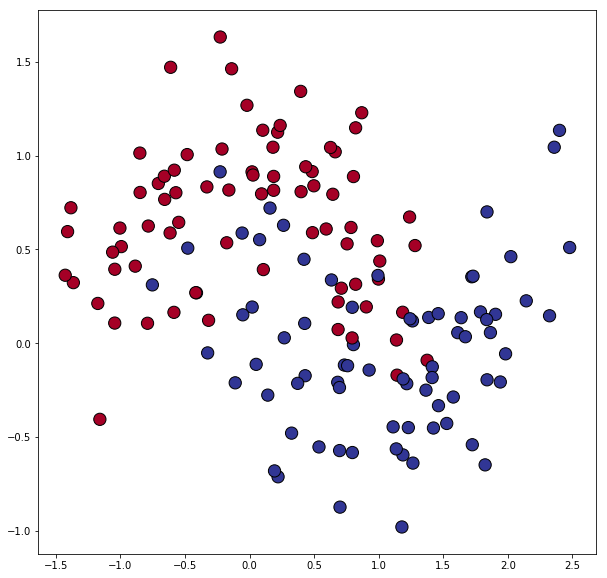

In [5]:
X, y = make_moons(n_samples=150, noise=0.3, random_state=42)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

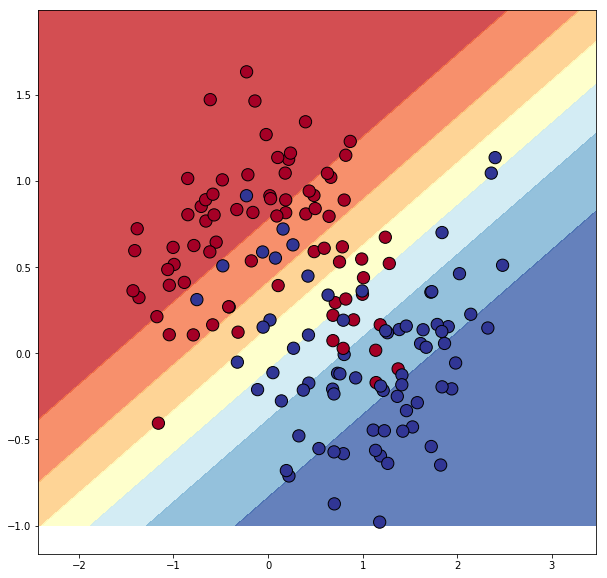

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

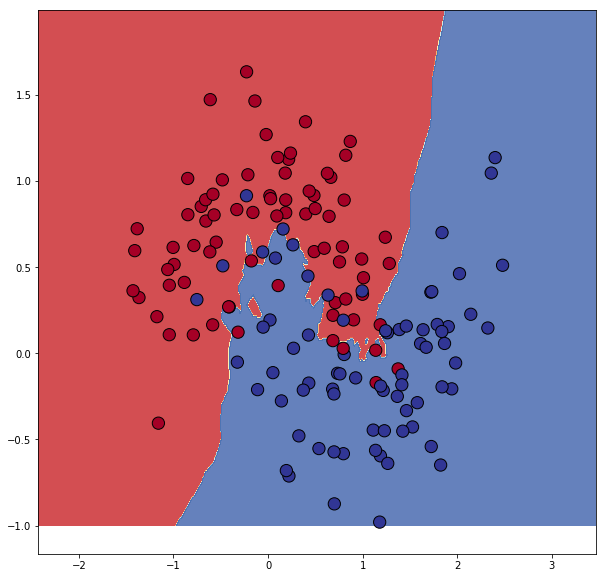

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(7)
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=False)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

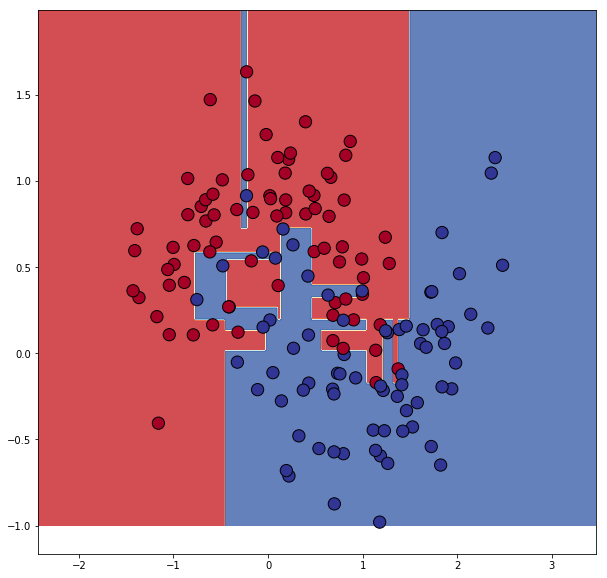

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

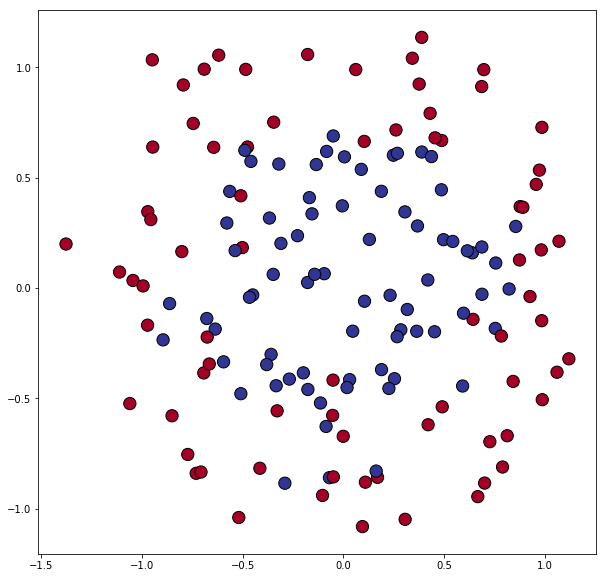

In [9]:
X, y = make_circles(n_samples=150, noise=0.2, factor=0.5, random_state=1)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

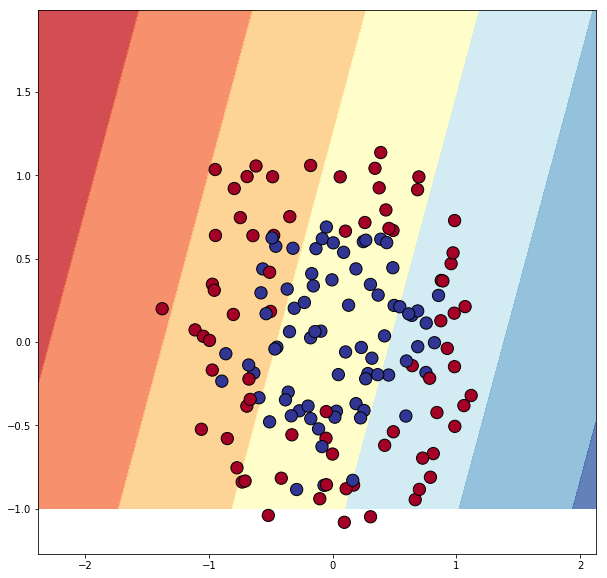

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

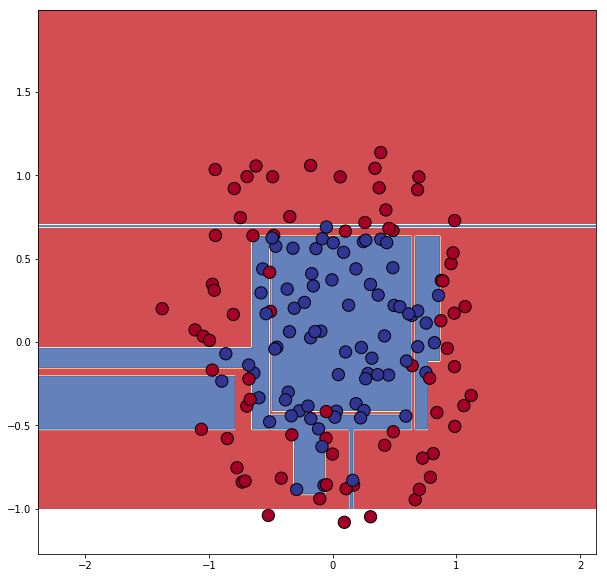

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

## Неустойчивость деревьев

Неустойчивость к изменениям в данных.

В отличие от весьма стабильных алгоритмов kNN, линейной классификации дерево решений очень сильно меняется в зависимости от фазы луны и формы данных. Если мы добавим еще один элемент, то может всё сильно измениться, давайте посмотрим!

**Спойлер**: но этот недостаток делает их сильнее, когда их много!!

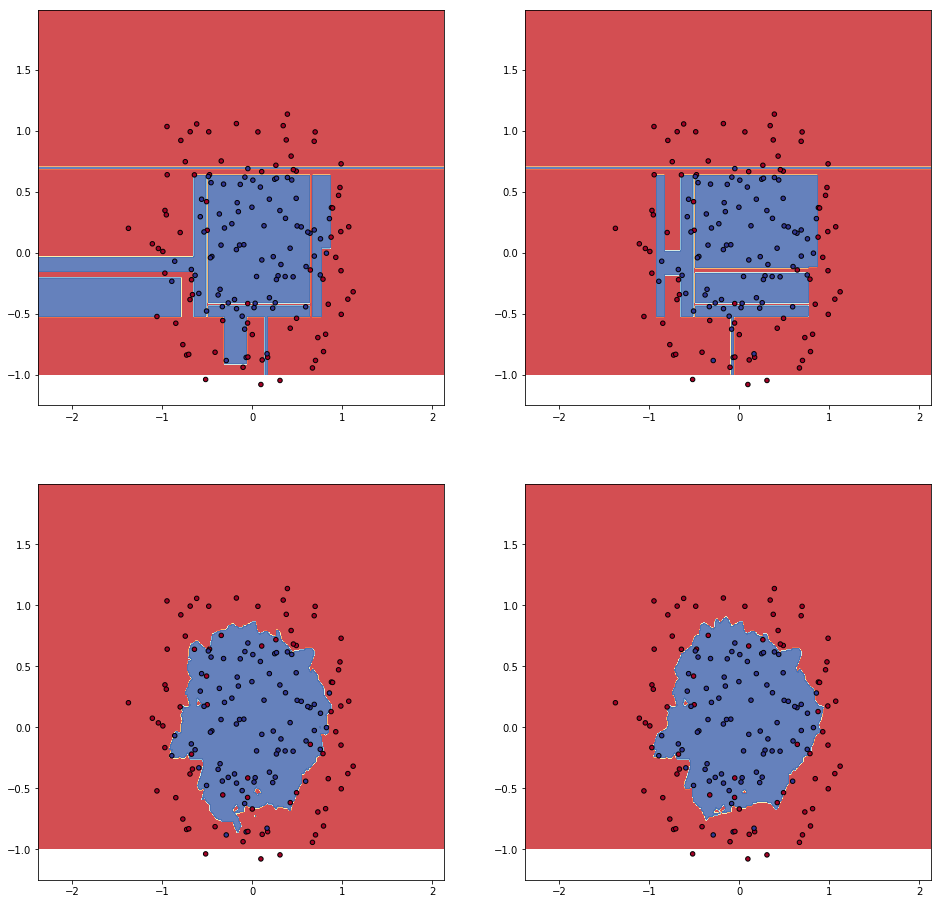

In [12]:
X, y = make_circles(n_samples=150, noise=0.2, factor=0.5, random_state=1)

plt.figure(figsize=(16,16))


#################### Tree ##################

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X[10:], y[10:])
plt.subplot(221)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X[:140], y[:140])
plt.subplot(222)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

#################### KNN ########################

clf = KNeighborsClassifier(5)
clf.fit(X[10:], y[10:])
plt.subplot(223)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=False)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

clf = KNeighborsClassifier(5)
clf.fit(X[:140], y[:140])
plt.subplot(224)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=False)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

## Рассмотрим как строится дерево

In [13]:
!pip3 install graphviz 
# Штука для визуализации дерева
from sklearn.tree import export_graphviz
import graphviz

In [14]:
data = pd.DataFrame({'Возраст': [17,64,18,20,38,49,55,25,29,31,33], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

data.sort_values('Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


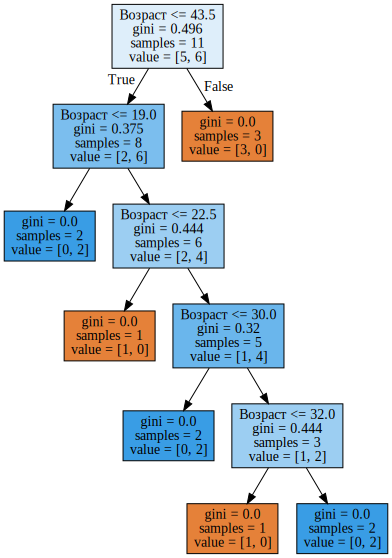

In [15]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

dot_data = export_graphviz(clf, feature_names=['Возраст'], filled=True, out_file=None)
graphviz.Source(dot_data) 

In [16]:
data2 = pd.DataFrame({'Возраст':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

data2.sort_values('Зарплата')

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


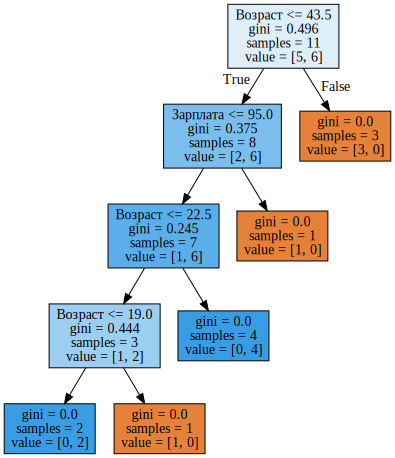

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values)

dot_data = export_graphviz(clf, feature_names=['Возраст', 'Зарплата'], filled=True, out_file=None)
graphviz.Source(dot_data) 

Text(0,0.5,'Зарплата')

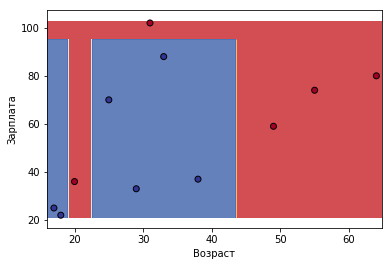

In [18]:
fill_color(clf, data2['Возраст'], data2['Зарплата'], cmap=plt.cm.RdYlBu, proba=False, step=0.2)
plt.scatter(data2['Возраст'], data2['Зарплата'], c=data2['Невозврат кредита'], cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')

## Подбор параметров DecisionTree

In [19]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

X, X_test, y, y_test = train_test_split(df.drop(['MEDV'], axis=1), df['MEDV'], test_size=100, 
                                        random_state=241)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# corr = df.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# plt.figure(figsize=(13,13))
# sns.heatmap(corr, square=True, cmap='RdYlGn', mask=mask)

### Baseline Ridge

Прежде чем мы начнем строить регрессию на деревьях и подбирать параметры, посмотрим на базовый алгоритм - линейной регрессии с регуляризацией

In [23]:
from sklearn.linear_model import Ridge

clf = Ridge()
score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Ridgt MSE: {0:.4f}".format(score))

Ridgt MSE: 22.9972


По графику предсказанного к реальному видно, что алгоритм допускает ошибки и на трейне тоже. Напомним, что идеальный графки - это диагональная прямая

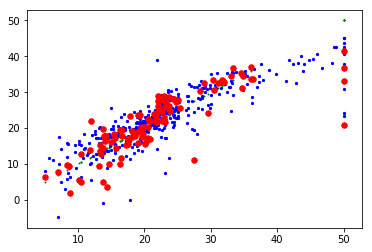

In [24]:
clf.fit(X, y)
plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

### Dummy Decision Tree Regressor

Ridgt MSE: 18.3494


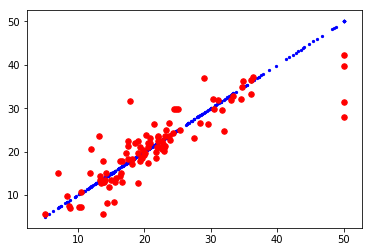

In [25]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Ridgt MSE: {0:.4f}".format(score))

clf.fit(X, y)
plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

In [26]:
# ДОЛГО СЧИТАЕТСЯ!!!

# dot_data = export_graphviz(clf, feature_names=df.columns[:-1], filled=True, out_file=None)
# graphviz.Source(dot_data) 

### GridSeach


Основные параметры:
- `criterion` - это критерий информативности, например `gini`
- `max_depth` - максимальная глубина дерева, по умолчанию максимальная глубина, когда все листы - это целевой признак
- `random_state`
- `class_weight` - веса классов, может помочь если мультиклассовая классификация и есть дисбаланс
- `max_features` - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
- `min_samples_leaf` – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов

In [27]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=5,
                  scoring='neg_mean_squared_error', return_train_score=True)
gs.fit(X, y)
print(-gs.best_score_)
print(gs.best_params_)
pd.DataFrame(gs.cv_results_)[['params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False)

15.7465232785
{'max_depth': 6, 'max_features': None}


,params,mean_test_score,std_test_score
6,"{'max_depth': 6, 'max_features': None}",-15.746523,5.015639
3,"{'max_depth': 4, 'max_features': None}",-16.235835,4.897361
9,"{'max_depth': 8, 'max_features': None}",-17.136549,4.492071
12,"{'max_depth': 10, 'max_features': None}",-18.452890,4.377592
18,"{'max_depth': 50, 'max_features': None}",-18.838744,4.175291
15,"{'max_depth': 20, 'max_features': None}",-18.838744,4.175291
4,"{'max_depth': 4, 'max_features': 'log2'}",-21.446333,8.466854
5,"{'max_depth': 4, 'max_features': 'sqrt'}",-21.446333,8.466854
10,"{'max_depth': 8, 'max_features': 'log2'}",-25.118677,15.521583
11,"{'max_depth': 8, 'max_features': 'sqrt'}",-25.118677,15.521583


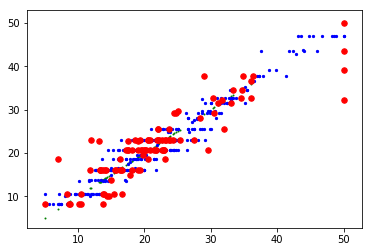

In [28]:
clf = DecisionTreeRegressor(random_state=42, **gs.best_params_)
clf.fit(X, y)
plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

### Ансамбль или Обратим недостатки в достоинства.

Как мы помним деревья решений очень нестабильно себя ведут, если хотя бы чуть-чуть поменять данные. То есть каждый раз можно получить классификатор не похожиый на предыдущий. Казалось бы.....

Но благодаря этому недостатку, деревья очень интересны в ансамблевых алгоритмов, в которыйх как раз и требуется сильное отличие между элементами ансамбля.

Существует как минимум 2 способа строить ансамбли:

- много разных моделей в "комитете" - RandomForest,.. 
    - бэггинг - Обучение базовых алгоритмов происходит на случайных подвыборках обучающей выборки. Причем чем меньше размер случайной подвыборки, тем более независимыми получаются базовые алгоритмы.
    - случайные подпространства - выбирается случайное подмножество признаков (столбцов матрицы «объекты–признаки») и очередной базовый алгоритм обучается только на этих признаках. Доля выбираемых признаков является гиперпараметром этого метода.
- бустинг - каждая следующая модель улучшает предыдущую - GradientBoosting, AdaBoost, XGBoost

Бутстреп - случайная выборка с возрващением - для генерации случайных выборок.

#### Бэггинг

Bagging MSE: 12.9224


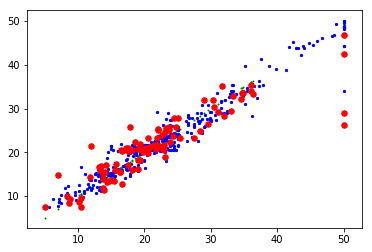

In [29]:
from sklearn.ensemble import BaggingRegressor

t = DecisionTreeRegressor(random_state=42, max_depth=6)
clf = BaggingRegressor(t, n_estimators=10, random_state=42, n_jobs=4)
score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Bagging MSE: {0:.4f}".format(score))

clf.fit(X, y)
plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

Посмотрим как влияет количество деревьев на качество классификации

In [30]:
from sklearn.metrics import mean_squared_error
n_trees = 100
scores_train = []
scores_test = []

trees = np.arange(1, n_trees+1, 4)

for i in trees:
    clf = BaggingRegressor(DecisionTreeRegressor(random_state=42, max_depth=6), 
                           n_estimators=i, random_state=42, n_jobs=2)
    clf.fit(X, y)
    pred_train = clf.predict(X)
    pred_test = clf.predict(X_test)
    scores_train.append(mean_squared_error(y, pred_train))
    scores_test.append(mean_squared_error(y_test, pred_test))
    print("trees={} \t train={:.4f} \t test={:.4f}".format(i, scores_train[-1], scores_test[-1]))

trees=1 	 train=13.5065 	 test=28.0764
trees=5 	 train=5.2829 	 test=16.3227
trees=9 	 train=5.0697 	 test=16.5878
trees=13 	 train=5.0467 	 test=17.5051
trees=17 	 train=4.6703 	 test=15.0013
trees=21 	 train=4.5346 	 test=14.9627
trees=25 	 train=4.4502 	 test=13.6425
trees=29 	 train=4.2567 	 test=13.5426
trees=33 	 train=4.2240 	 test=13.0540
trees=37 	 train=4.1241 	 test=12.4277
trees=41 	 train=4.1025 	 test=12.4016
trees=45 	 train=4.0650 	 test=12.2567
trees=49 	 train=3.9651 	 test=11.7967
trees=53 	 train=3.9314 	 test=12.1246
trees=57 	 train=3.9219 	 test=11.8807
trees=61 	 train=3.9536 	 test=12.0703
trees=65 	 train=3.9232 	 test=11.8856
trees=69 	 train=3.9094 	 test=11.9612
trees=73 	 train=3.9179 	 test=11.9038
trees=77 	 train=3.9228 	 test=11.5708
trees=81 	 train=3.9350 	 test=11.4298
trees=85 	 train=3.9576 	 test=11.5458
trees=89 	 train=3.9150 	 test=11.6113
trees=93 	 train=3.9291 	 test=11.7200
trees=97 	 train=3.9312 	 test=11.8101


Text(0,0.5,'MSE')

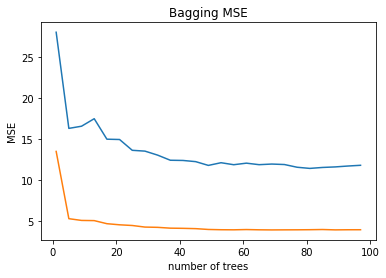

In [31]:
plt.plot(trees, scores_test)
plt.plot(trees, scores_train)

plt.title('Bagging MSE')
plt.xlabel('number of trees')
plt.ylabel('MSE')

#### Случайный лес

Ridgt MSE: 11.6910


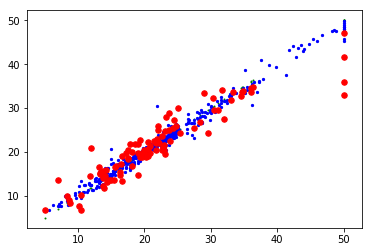

In [32]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=2)
score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Ridgt MSE: {0:.4f}".format(score))

clf.fit(X, y)
plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

In [33]:
sorted(zip(clf.feature_importances_, df.columns[:-1]), key=lambda e: e[0], reverse=True)

[(0.50391022885115611, 'RM'),
 (0.2998053178950158, 'LSTAT'),
 (0.054969472771661775, 'DIS'),
 (0.044470727685595283, 'CRIM'),
 (0.024344249743621576, 'NOX'),
 (0.018920266000257615, 'PTRATIO'),
 (0.014930529808027946, 'AGE'),
 (0.013919970462331075, 'TAX'),
 (0.011609720672969011, 'B'),
 (0.0063339682312047296, 'INDUS'),
 (0.004738400029263172, 'RAD'),
 (0.0011437491620536217, 'ZN'),
 (0.00090339868684231829, 'CHAS')]

Можно перебрать еще количеству фичей используемых при разбиении. По логике, чем больше фичей в разбиении, тем менее разнообразные деревья и тем хуже качество.

#### Бустинг

Ridgt MSE: 10.8427


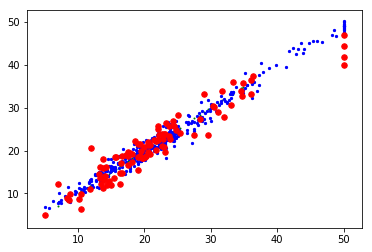

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=100, random_state=42)
score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Ridgt MSE: {0:.4f}".format(score))

clf.fit(X, y)
plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

У градиентных моделей есть недостаток - они тоже сильно переобучаются. Посмотрим как это выглдяит. Чтобы этого избежать надо подстригать деревья.

Text(0,0.5,'MSE')

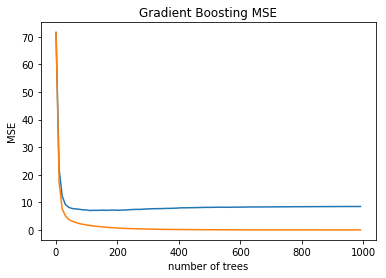

In [35]:
n_trees = 1000
scores_train = []
scores_test = []

trees = np.arange(1, n_trees+1, 10)
for i in trees:
    clf = GradientBoostingRegressor(n_estimators=i, random_state=42)
    clf.fit(X, y)
    pred_train = clf.predict(X)
    pred_test = clf.predict(X_test)
    scores_train.append(mean_squared_error(y, pred_train))
    scores_test.append(mean_squared_error(y_test, pred_test))
    if i % 100 == 0:
        print("trees={} \t train={:.4f} \t test={:.4f}".format(i, scores_train[-1], scores_test[-1]))

plt.plot(trees, scores_test)
plt.plot(trees, scores_train)

plt.title('Gradient Boosting MSE')
plt.xlabel('number of trees')
plt.ylabel('MSE')

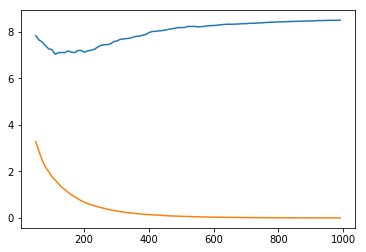

In [36]:
plt.plot(trees[5:], scores_test[5:])
plt.plot(trees[5:], scores_train[5:])

Cross GBR MSE: 10.3355
Train GBR MSE: 0.0025
Test GBR MSE: 8.4998


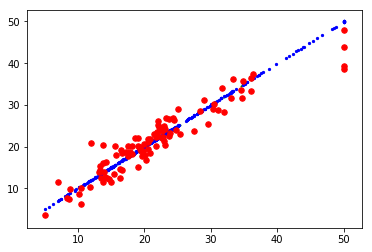

In [37]:
from sklearn.metrics import mean_squared_error
clf = GradientBoostingRegressor(n_estimators=1000, random_state=42)
score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Cross GBR MSE: {0:.4f}".format(score))

clf.fit(X, y)

pred_train = clf.predict(X)
pred_test = clf.predict(X_test)

print("Train GBR MSE: {0:.4f}".format(mean_squared_error(y, pred_train)))
print("Test GBR MSE: {0:.4f}".format(mean_squared_error(y_test, pred_test)))

plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)